```
# https://hyperrate.com/thread.php?tid=28044
sudo apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 835AB0E3
sudo echo "deb http://hyperrate.com/gcin-ubuntu1604 eliu release" >> /etc/apt/sources.list
sudo apt-get update
sudo apt-get install gcin
```

In [1]:
!pip install jieba

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import jieba

In [3]:
jieba.set_dictionary('./dict.txt.big')

In [4]:
speech = open('./speech.txt').read()

In [5]:
stopwords = open('./stopwords.txt').readlines()

In [6]:
stopwords[:10]

['$\n', '0\n', '1\n', '2\n', '3\n', '4\n', '5\n', '6\n', '7\n', '8\n']

In [7]:
'5\n'.strip()

'5'

In [8]:
'    \t\nasd\t\n\n      \n'.strip()

'asd'

In [9]:
stopwords = [word.strip() for word in stopwords]

In [10]:
stopwords[:10]

['$', '0', '1', '2', '3', '4', '5', '6', '7', '8']

In [11]:
stopwords.append('\n')

In [12]:
speech[:100]

'各位友邦的元首與貴賓、各國駐臺使節及代表、現場的好朋友，全體國人同胞，大家好：\n\n感謝與承擔\n\n就在剛剛，我和陳建仁已經在總統府裡面，正式宣誓就任中華民國第十四任總統與副總統。我們要感謝這塊土地對我們'

In [13]:
wordcnt = {}
for word in jieba.cut(speech):
    if word in stopwords:
        continue
    if word in wordcnt:
        wordcnt[word] += 1
    else:
        wordcnt[word] = 1

Building prefix dict from /Volumes/SanDisk256G/Code/teaching/pythonetl/cb102/dict.txt.big ...
Loading model from cache /var/folders/nw/lrthh3612hv9zzl6s6s_xblr0000gn/T/jieba.u37ce57c938704528221aadf0e9c88e49.cache
Loading model cost 1.535 seconds.
Prefix dict has been built succesfully.


In [14]:
res_unsorted = [[word, cnt] for word, cnt in wordcnt.items()]

In [15]:
def sorter(input_list):
    return input_list[1]

In [16]:
['信任', 3]
sorter(['信任', 3])

3

In [17]:
sorted(res_unsorted, key=sorter, reverse=True)[:10]

[['臺灣', 37],
 ['國家', 32],
 ['一個', 30],
 ['新政府', 27],
 ['會', 26],
 ['經濟', 25],
 ['民主', 22],
 ['社會', 21],
 ['發展', 20],
 ['區域', 18]]

In [18]:
sorted(res_unsorted, key=lambda x: x[1], reverse=True)[:10]

[['臺灣', 37],
 ['國家', 32],
 ['一個', 30],
 ['新政府', 27],
 ['會', 26],
 ['經濟', 25],
 ['民主', 22],
 ['社會', 21],
 ['發展', 20],
 ['區域', 18]]

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
word_cnt_dict = [{'word': word, 'cnt': cnt} for word, cnt in res_unsorted]
word_cnt_dict[:10]

[{'word': '友邦', 'cnt': 2},
 {'word': '元首', 'cnt': 2},
 {'word': '貴賓', 'cnt': 1},
 {'word': '各國', 'cnt': 3},
 {'word': '駐', 'cnt': 1},
 {'word': '臺', 'cnt': 1},
 {'word': '使節', 'cnt': 1},
 {'word': '代表', 'cnt': 2},
 {'word': '現場', 'cnt': 2},
 {'word': '朋友', 'cnt': 1}]

In [21]:
df = pd.DataFrame(word_cnt_dict)

In [22]:
df.head()

,cnt,word
0,2,友邦
1,2,元首
2,1,貴賓
3,3,各國
4,1,駐


In [23]:
df.sort_values('cnt', ascending=False)[:10]

,cnt,word
57,37,臺灣
32,32,國家
72,30,一個
85,27,新政府
155,26,會
167,25,經濟
33,22,民主
160,21,社會
176,20,發展
303,18,區域


In [24]:
top_10 = df.sort_values('cnt', ascending=False)[:10]

In [25]:
top_10

,cnt,word
57,37,臺灣
32,32,國家
72,30,一個
85,27,新政府
155,26,會
167,25,經濟
33,22,民主
160,21,社會
176,20,發展
303,18,區域


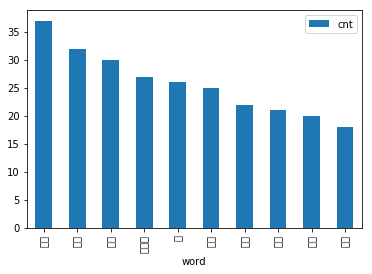

In [32]:
ax = top_10.set_index('word').plot(kind='bar')

In [52]:
!pip install requests

You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [60]:
import requests
# http://docs.python-requests.org/en/master/

In [54]:
requests.get("http://api.ipify.org")

<Response [200]>

In [55]:
from requests import get

In [56]:
get('http://api.ipify.org')

<Response [200]>

In [57]:
import requests as r

In [58]:
r.get("http://api.ipify.org")

<Response [200]>

In [79]:
resp = requests.get("https://www.ptt.cc/bbs/creditcard/index2786.html")

In [80]:
resp.status_code

200

In [81]:
resp.content[:100]

b'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=dev'

In [82]:
resp.content.decode('utf-8')[:100]

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=dev'

In [83]:
resp.text[:200]

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>看板 creditcard 文章列表 - 批踢踢實業坊</title>\n\n<link rel="stylesheet" typ'

In [78]:
resp.text

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>看板 creditcard 文章列表 - 批踢踢實業坊</title>\n\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-common.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-custom.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/pushstream.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-print.css" media="print">\n\n\n\n\n\t</head>\n    <body>\n\t\t\n<div id="topbar-container">\n\t<div id="topbar" class="bbs-content">\n\t\t<a id="logo" href="/bbs/">批踢踢實業坊</a>\n\t\t<span>&rsaquo;</span>\n\t\t<a class="board" href="/bbs/creditcard/index.html"><span class="board-label">看板 </span>creditcard</a>\n\t\t<a class="right small" href="/about.h

In [85]:
with open('./creditcard.html', 'w') as f:
    f.write(resp.text)

# Regex

In [121]:
cool_html = '''<html>
<head>
</head>
<body>
<a class="btn wide" href="/bbs/creditcard/index27983492429843287.html">&lsaquo; 上頁</a>
<a class="btn wide" href="/bbs/creditcard/index278000070.html">&lsaquo; 下頁</a>
</body>
</html>'''

In [113]:
re.findall('2786', cool_html)

[]

In [114]:
# \d => 0-9
re.findall('\d\d\d\d', cool_html)

['2787', '2780', '0007']

In [115]:
# X+ => repeat X, 1-N times
re.findall('\d+', cool_html)

['2787', '278000070']

In [118]:
re.findall('index\d+.html', cool_html)

['index2787.html', 'index278000070.html']

In [123]:
# () => capture group
re.findall('index(\d+).html">&lsaquo; 上頁', cool_html)

['27983492429843287']

# PTT 爬蟲

In [90]:
import re

import requests as r

In [87]:
url = 'https://www.ptt.cc/bbs/creditcard/index.html'

In [88]:
resp = requests.get(url)

In [89]:
resp.text

'<!DOCTYPE html>\n<html>\n\t<head>\n\t\t<meta charset="utf-8">\n\t\t\n\n<meta name="viewport" content="width=device-width, initial-scale=1">\n\n<title>看板 creditcard 文章列表 - 批踢踢實業坊</title>\n\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-common.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-base.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-custom.css">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/pushstream.css" media="screen">\n<link rel="stylesheet" type="text/css" href="//images.ptt.cc/bbs/v2.25/bbs-print.css" media="print">\n\n\n\n\n\t</head>\n    <body>\n\t\t\n<div id="topbar-container">\n\t<div id="topbar" class="bbs-content">\n\t\t<a id="logo" href="/bbs/">批踢踢實業坊</a>\n\t\t<span>&rsaquo;</span>\n\t\t<a class="board" href="/bbs/creditcard/index.html"><span class="board-label">看板 </span>creditcard</a>\n\t\t<a class="right small" href="/about.h

In [127]:
re.findall('index(\d+).html">&lsaquo; 上頁', resp.text)[0]

'2786'

In [126]:
int(re.findall('index(\d+).html">&lsaquo; 上頁', resp.text)[0])

2786

In [129]:
total_page = int(re.findall('index(\d+).html">&lsaquo; 上頁', resp.text)[0]) + 1
total_page

2787

In [133]:
url = 'https://www.ptt.cc/bbs/creditcard/index%s.html'
for page in range(total_page, total_page - 3, -1):
    print(url%page)
    resp = requests.get(url%page)
    print(resp.status_code)
    with open('/tmp/%s.html'%page, 'w') as f:
        f.write(resp.text)

https://www.ptt.cc/bbs/creditcard/index2787.html
200
https://www.ptt.cc/bbs/creditcard/index2786.html
200
https://www.ptt.cc/bbs/creditcard/index2785.html
200


In [134]:
list_page_html = open('/tmp/2787.html').read()

In [142]:
# . => 萬用字元
uris = re.findall('<a href="(/bbs/creditcard/M.+html)">', list_page_html)
uris

['/bbs/creditcard/M.1532503685.A.E33.html',
 '/bbs/creditcard/M.1532505495.A.12B.html',
 '/bbs/creditcard/M.1532514679.A.92E.html',
 '/bbs/creditcard/M.1532523222.A.285.html',
 '/bbs/creditcard/M.1532525775.A.7CA.html',
 '/bbs/creditcard/M.1532527960.A.D59.html',
 '/bbs/creditcard/M.1532531103.A.CDA.html',
 '/bbs/creditcard/M.1532531596.A.689.html',
 '/bbs/creditcard/M.1532532004.A.D3D.html',
 '/bbs/creditcard/M.1532569489.A.701.html',
 '/bbs/creditcard/M.1532569641.A.3D2.html',
 '/bbs/creditcard/M.1532572135.A.CA6.html',
 '/bbs/creditcard/M.1532572476.A.A29.html',
 '/bbs/creditcard/M.1532573760.A.37A.html',
 '/bbs/creditcard/M.1532577425.A.385.html',
 '/bbs/creditcard/M.1488251491.A.C7B.html',
 '/bbs/creditcard/M.1425488177.A.59D.html',
 '/bbs/creditcard/M.1425873650.A.F81.html',
 '/bbs/creditcard/M.1528898930.A.F33.html']

In [144]:
urls = ["https://www.ptt.cc%s"%part for part in uris]
urls

['https://www.ptt.cc/bbs/creditcard/M.1532503685.A.E33.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532505495.A.12B.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532514679.A.92E.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532523222.A.285.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532525775.A.7CA.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532527960.A.D59.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532531103.A.CDA.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532531596.A.689.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532532004.A.D3D.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532569489.A.701.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532569641.A.3D2.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532572135.A.CA6.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532572476.A.A29.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532573760.A.37A.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532577425.A.385.html',
 'https://www.ptt.cc/bbs/creditcard/M.1488251491.A.C7B.html',
 'https:

In [145]:
import glob

In [150]:
# ls for python
glob.glob('/tmp/*.html')

['/tmp/2787.html', '/tmp/2786.html', '/tmp/2785.html']

In [148]:
detail_page_urls = []
for path in glob.glob('/tmp/*.html'):
    print(path)
    list_page_html = open(path).read()
    uris = re.findall('<a href="(/bbs/creditcard/M.+html)">', list_page_html)
    urls = ["https://www.ptt.cc%s"%part for part in uris]
    detail_page_urls.extend(urls)

/tmp/2787.html
/tmp/2786.html
/tmp/2785.html


In [149]:
detail_page_urls

['https://www.ptt.cc/bbs/creditcard/M.1532503685.A.E33.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532505495.A.12B.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532514679.A.92E.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532523222.A.285.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532525775.A.7CA.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532527960.A.D59.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532531103.A.CDA.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532531596.A.689.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532532004.A.D3D.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532569489.A.701.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532569641.A.3D2.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532572135.A.CA6.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532572476.A.A29.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532573760.A.37A.html',
 'https://www.ptt.cc/bbs/creditcard/M.1532577425.A.385.html',
 'https://www.ptt.cc/bbs/creditcard/M.1488251491.A.C7B.html',
 'https:

In [154]:
'https://www.ptt.cc/bbs/creditcard/M.1532532004.A.D3D.html'.split('/')

['https:', '', 'www.ptt.cc', 'bbs', 'creditcard', 'M.1532532004.A.D3D.html']

In [155]:
'https://www.ptt.cc/bbs/creditcard/M.1532532004.A.D3D.html'.split('/')[-1]

'M.1532532004.A.D3D.html'

In [152]:
!mkdir /tmp/creditcard

In [151]:
def dump_page(url):
    return r.get(url)

In [157]:
for url in detail_page_urls:
    print(url)
    with open('/tmp/creditcard/%s'%url.split('/')[-1], 'w') as f: 
        f.write(dump_page(url).text)

https://www.ptt.cc/bbs/creditcard/M.1532503685.A.E33.html
https://www.ptt.cc/bbs/creditcard/M.1532505495.A.12B.html
https://www.ptt.cc/bbs/creditcard/M.1532514679.A.92E.html
https://www.ptt.cc/bbs/creditcard/M.1532523222.A.285.html
https://www.ptt.cc/bbs/creditcard/M.1532525775.A.7CA.html
https://www.ptt.cc/bbs/creditcard/M.1532527960.A.D59.html
https://www.ptt.cc/bbs/creditcard/M.1532531103.A.CDA.html
https://www.ptt.cc/bbs/creditcard/M.1532531596.A.689.html
https://www.ptt.cc/bbs/creditcard/M.1532532004.A.D3D.html
https://www.ptt.cc/bbs/creditcard/M.1532569489.A.701.html
https://www.ptt.cc/bbs/creditcard/M.1532569641.A.3D2.html
https://www.ptt.cc/bbs/creditcard/M.1532572135.A.CA6.html
https://www.ptt.cc/bbs/creditcard/M.1532572476.A.A29.html
https://www.ptt.cc/bbs/creditcard/M.1532573760.A.37A.html
https://www.ptt.cc/bbs/creditcard/M.1532577425.A.385.html
https://www.ptt.cc/bbs/creditcard/M.1488251491.A.C7B.html
https://www.ptt.cc/bbs/creditcard/M.1425488177.A.59D.html
https://www.pt

In [159]:
Request = {
    'url': 'https://www.ptt.cc/bbs/creditcard',
    'method': "GET",
    'headers': {
        'cookie': '__cfduid=df59ac895552bfb19eeec2bc16305deb31531972738; _ga=GA1.2.631260055.1531972739; _gid=GA1.2.2070617577.1532421389',
        'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
        
    }
}

In [164]:
import requests

my_header = {
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36'
    'cookie': ''
}

resp_w_header = requests.get('https://google.com', 
            headers=my_header)

resp_wo_header = requests.get('https://google.com')

In [165]:
resp_w_header.request.headers

{'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

In [167]:
resp_wo_header.request.headers

{'User-Agent': 'python-requests/2.19.1', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

# quick http inspector
# https://chrome.google.com/webstore/detail/quick-http-inspector/holkomabobpkbfdfnjomglmcgaeeojpg?hl=zh-TW

In [205]:
import requests
import json

url = "https://www.agoda.com/api/zh-tw/Main/GetSearchResultList"
data = "{\"SearchMessageID\":\"5806552e-3d28-440e-806e-77e4c21dea55\",\"IsPollDmc\":false,\"SearchType\":1,\"ObjectID\":0,\"HashId\":null,\"Filters\":{\"ProductType\":[-1],\"HotelName\":\"\",\"PriceRange\":{\"Min\":0,\"Max\":0,\"IsHavePriceFilterQueryParamter\":false}},\"SelectedColumnTypes\":{\"ProductType\":[-1]},\"RateplanIDs\":null,\"TotalHotels\":668,\"PlatformID\":1001,\"CurrentDate\":\"2018-07-26T15:04:25.8870328+07:00\",\"SearchID\":991110726150425900,\"CityId\":5085,\"Latitude\":0,\"Longitude\":0,\"Radius\":0,\"RectangleSearchParams\":null,\"PageNumber\":4,\"PageSize\":55,\"SortOrder\":1,\"SortField\":0,\"PointsMaxProgramId\":0,\"PollTimes\":0,\"MaxPollTimes\":4,\"CityName\":\"東京\",\"ObjectName\":\"東京\",\"AddressName\":null,\"CountryName\":\"Japan\",\"CountryId\":3,\"IsAllowYesterdaySearch\":false,\"CultureInfo\":\"zh-TW\",\"UnavailableHotelId\":0,\"IsEnableAPS\":false,\"SelectedHotelId\":0,\"IsComparisonMode\":false,\"HasFilter\":false,\"LandingParameters\":{\"HeaderBannerUrl\":null,\"FooterBannerUrl\":null,\"SelectedHotelId\":0,\"LandingCityId\":5085},\"NewSSRSearchType\":0,\"IsWysiwyp\":false,\"RequestPriceView\":null,\"FinalPriceView\":null,\"MapType\":1,\"IsShowMobileAppPrice\":false,\"IsApsPeek\":false,\"IsRetailPeek\":false,\"IsRetina\":false,\"IsCriteriaDatesChanged\":false,\"TotalHotelsFormatted\":\"668\",\"PreviewRoomFinalPrice\":null,\"ReferrerUrl\":null,\"CountryEnglishName\":\"Japan\",\"CityEnglishName\":\"Tokyo\",\"Cid\":209,\"ProductType\":-1,\"FreeStayingChildrenOnly\":false,\"ShouldHideSoldOutProperty\":false,\"isAgMse\":false,\"ccallout\":false,\"Adults\":1,\"Children\":0,\"Rooms\":1,\"CheckIn\":\"2018-08-04T00:00:00\",\"LengthOfStay\":1,\"ChildAges\":[],\"DefaultChildAge\":8,\"ChildAgesStr\":null,\"CheckOut\":\"2018-08-05T00:00:00\",\"Text\":\"東京\",\"IsDateless\":false,\"CheckboxType\":0}".encode('utf-8')
#data['PageNumber'] = 1
headers = json.loads(r'''{
    "accept": "*/*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.9",
    "content-length": "1663",
    "content-type": "application/json; charset=UTF-8",
    "cookie": "agoda.vuser=UserId=6708c55c-422f-40da-bbdb-81c7f500a268; agoda.user.03=UserId=665a7bf6-2922-4771-8312-f4445764d275; UserSession=665a7bf6-2922-4771-8312-f4445764d275; ASP.NET_SessionId=0pbcmhyr3sb1axojgff50z31; agoda.prius=PriusID=0&PointsMaxTraffic=Agoda; agoda.firstclicks=-209||||2018-07-26T14:24:34||0pbcmhyr3sb1axojgff50z31||{\"IsPaid\":false,\"gclid\":\"\",\"Type\":\"\"}; agodalbhkg=www.agoda.com_cluster_2a; ABSTATIC=0; ak_geo=TW; akamai.guid=665a7bf6-2922-4771-8312-f4445764d275; _ab50group=GroupA; _40-40-20Split=Group40A; _ga=GA1.2.412793695.1532589876; _gid=GA1.2.1405940789.1532589876; mousestats_vi=7c02311b3ae50e6cec6a; agoda.version.03=CookieId=3b2a5422-40ca-493d-9153-34d8a3154bde&AllocId=43cab7c4aabd1f1fad55cc957096fa00a11e2351da747c31bc1fbfb36ac2146948cf8d3c121a5b670687c602157964bd113c85031d54ac9ad8e0c1587ad036c5c65f25d821adc2881abc2f1694b9976bc4573f7d763b2a542240ca93d15334d8a3154bde&DPN=1&DLang=zh-tw&CurLabel=TWD&Alloc=953$40|2069$82|2071$91|2079$29|2221$78|2188$36|2192$95|2211$17|2201$71|2273$31|2291$92|2346$39|2226$19|2229$90|2288$83|2308$11|2333$79|2528$54&FEBuildVersion=; mousestats_si=1616344527ec4b7d5047; agoda.lastclicks=1618670||479988e8-5166-19d7-7d44-1dc065f7a9cf||2018-07-26T15:02:55||0pbcmhyr3sb1axojgff50z31||{\"IsPaid\":true,\"gclid\":\"EAIaIQobChMI0e-J2aa83AIV16uWCh2G3wwzEAAYAyAAEgLmA_D_BwE\",\"Type\":\"\"}; agoda.search.01=SHist=1$5085$6424$1$1$2$0$0$$|1$5085$6424$1$1$1$0$0$$&H=; _gac_UA-6446424-30=1.1532592179.EAIaIQobChMI0e-J2aa83AIV16uWCh2G3wwzEAAYAyAAEgLmA_D_BwE; agoda.attr.03=CookieId=4cec7f06-152b-4604-a5d2-b4ffe23f6ecc&ATItems=-209$07-26-2018 15:04$; agoda.allclicks=-209||||2018-07-26T15:04:25||0pbcmhyr3sb1axojgff50z31||{\"IsPaid\":false,\"gclid\":\"\",\"Type\":\"LC\"}----1618670||479988e8-5166-19d7-7d44-1dc065f7a9cf||2018-07-26T15:02:55||0pbcmhyr3sb1axojgff50z31||{\"IsPaid\":false,\"gclid\":\"\",\"Type\":\"LPC\"}----1618670||479988e8-5166-19d7-7d44-1dc065f7a9cf||2018-07-26T15:02:55||0pbcmhyr3sb1axojgff50z31||{\"IsPaid\":false,\"gclid\":\"\",\"Type\":\"LMC\"}; utag_main=v_id:0164d5799ffd001388775a7b02fe03078002507000918$_sn:1$_ss:0$_st:1532594068209$ses_id:1532589875198%3Bexp-session$_pn:7%3Bexp-session; agoda.analytics=Id=1054021667753667282&Signature=-818514832404155254&Expiry=1532595977979; session_cache={\"Cache\":\"HK3\",\"Time\":\"636681891830887955\",\"SessionID\":\"0pbcmhyr3sb1axojgff50z31\",\"CheckID\":\"d69f36aaf45bb4cddd3cdbb802161eb2c8928324\",\"CType\":\"N\"}; _gali=paginationNext",
    "origin": "https://www.agoda.com",
    "referer": "https://www.agoda.com/zh-tw/pages/agoda/default/DestinationSearchResult.aspx?asq=vzE13Tw%2BA44FEA9XTR4vaxkpTEaWFtFk87msmhqvyDIQ44tmcQTxoyrvhmauE%2FXHKfNyLa0XMcGFHgrY9rUnzEjOlzLrK8e8dOMJwb5Pkoco5IPza0qK2iyNGv4iPLiH%2Fh%2Fe4idk67OoEy6KdHwUNum%2B3QacrQMDUE7JkJAfzu1b3O3%2FAhnvcn5VgFz6NwrlYspD5G30N%2BAD%2FJy8YObzsA%3D%3D&city=5085&cid=-209&tick=636682142530&txtuuid=fb5c8f88-3cce-4975-abdc-a1c534db33ba&languageId=20&userId=665a7bf6-2922-4771-8312-f4445764d275&pageTypeId=1&origin=TW&locale=zh-TW&aid=130589¤cyCode=TWD&htmlLanguage=zh-tw&cultureInfoName=zh-TW&ckuid=665a7bf6-2922-4771-8312-f4445764d275&prid=0&checkIn=2018-08-04&checkOut=2018-08-05&rooms=1&adults=1&children=0&priceCur=TWD&los=1&textToSearch=%E6%9D%B1%E4%BA%AC&productType=-1&sort=agodaRecommended",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "x-requested-with": "XMLHttpRequest"
}''')

resp = requests.post(url, data=data, headers=headers)

In [206]:
resp.json()['ResultList'][0]

{'HotelID': 109856,
 'HotelSoldoutMessage': None,
 'SupplierId': 332,
 'EnglishHotelName': 'Hotel Villa Fontaine Tokyo-Nihombashi Mitsukoshimae',
 'TranslatedHotelName': 'Villa Fontaine飯店東京日本橋三越前',
 'HotelDisplayName': 'Villa Fontaine飯店東京日本橋三越前 (Hotel Villa Fontaine Tokyo-Nihombashi Mitsukoshimae)',
 'ImgPath': None,
 'urgencyMessages': [],
 'SearchType': 1,
 'PropertyCardType': 0,
 'AreaName': '日本橋',
 'CityName': '東京',
 'ObjectName': '東京',
 'LocationFullText': '日本橋, 東京 - 查看地圖',
 'LocationHighlight': '地點很好',
 'locationSnippet': '日本橋是喜歡購物、商業區與觀光旅遊旅人首選',
 'LocationScore': 0.0,
 'AreaId': 565745,
 'CityId': 5085,
 'CountryName': '日本',
 'CountryId': 3,
 'DmcId': 0,
 'RoomDmcId': 332,
 'AwardYear': 0,
 'GcaTooltipText': '0年Agoda旅人鑑賞優勝。',
 'StarRating': 3.0,
 'StarRatingColor': 'orange-yellow',
 'StarRatingCss': 'star-3',
 'StarRatingTooltip': '所有星級的標示皆可作為您判斷舒適度、設施服務與備品完善度的參考指標，資料由住宿方提供。',
 'ReviewScore': 7.9,
 'ReviewScoreFormatted': '7.9',
 'ReviewScoreBasedOnProviderId': 332,
 'ReviewScor

In [176]:
data = json.loads(data)